In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [4]:
path = "jsonformatter.txt"

#Imprt dataset
with open(path) as content:
  data1 = json.load(content)

In [5]:
tag = []
patterns = []
responses = {}

#getting all data to list
for intent in data1['intents']:
  responses[intent['tag']] = intent['responses']
  for lines in intent['patterns']:
    patterns.append(lines)
    tag.append(intent['tag'])
  


In [6]:
# convert to dataframe
data = pd.DataFrame({'patterns':patterns,
                     'tags': tag})

In [7]:
#print
data

,patterns,tags
0,Hai,salam
1,Hi,salam
2,Halo,salam
3,Apa Kabar,salam
4,Selamat Pagi,salam
...,...,...
135,apa itu ILC?,UPT Kantor Urusan Internasional dan Language C...
136,Apa visi dan misi ILC?,UPT Kantor Urusan Internasional dan Language C...
137,Informasi tentang perpustakaan ummi?,UPT Perpustakaan
138,visi misi dari perpustakaan ummi?,UPT Perpustakaan


In [8]:
#Pre-Processing
import string
data['patterns'] = data['patterns'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['patterns'] = data['patterns'].apply(lambda wrd: ''.join(wrd))

In [9]:
data

,patterns,tags
0,hai,salam
1,hi,salam
2,halo,salam
3,apa kabar,salam
4,selamat pagi,salam
...,...,...
135,apa itu ilc,UPT Kantor Urusan Internasional dan Language C...
136,apa visi dan misi ilc,UPT Kantor Urusan Internasional dan Language C...
137,informasi tentang perpustakaan ummi,UPT Perpustakaan
138,visi misi dari perpustakaan ummi,UPT Perpustakaan


In [10]:
#tokenize
tokenizer = Tokenizer(num_words = 2000)
tokenizer.fit_on_texts(data['patterns'])
train = tokenizer.texts_to_sequences(data['patterns'])

print(tokenizer)

#applying padding
x_train = pad_sequences(train)

print(x_train)

#encoding the methods
le = LabelEncoder()

print(le)
y_train = le.fit_transform(data['tags'])
print(y_train)


[[  0   0   0 ...   0   0  99]
 [  0   0   0 ...   0   0 100]
 [  0   0   0 ...   0   0 101]
 ...
 [  0   0   0 ...  85  62   2]
 [  0   0   0 ...  12  62   2]
 [  0   0   0 ...  62   2   5]]
LabelEncoder()
[29 29 29 29 29 29 29 29 29 29 27 27 27 27 27 27 27 27 28 28 28 28 28 28
  7  7  7  7 14 14 14 14 14 14 13 13 13 30 30 30 18 18 18  0  0  0  6  6
  6  2  2  2  2  2 17 17 17 17 17 16 16  3  3  3 19 19 19 19  8  8  8  8
  8  8  8 22 22 22 22 22 22 26 26 26 26 26 21 21 21 21 15 15 15 15 15 12
 12 12 12 12  5  5  5  5 11 11 11 11  9  9  9  9  9  1  1  1  1  1  1  4
  4  4  4  4 10 10 10 10 10 20 23 23 23 23 24 24 24 25 25 25]


In [11]:
#tensorflow tokenizer assigns a unique token to each ditinc word and padding is done to get all the data to the same length so as to send it to rnn layer

In [12]:
input_shape = x_train.shape[1]
input_shape

9

#define vocabulary

In [13]:
vocabulary = len(tokenizer.word_index)
print('number of unique words : ', vocabulary)
output_length = le.classes_.shape[0]
print('output length', output_length)

number of unique words :  175
output length 31


In [14]:
# Neural Network
# The network constist of an embedding layer which is one of the most powerful things in the fueld on tlp, the output of the embedding layer is the input of tge recurrenct layer with lstm gate the output is flattened and regular dense layer is used with a softmax activation
#creating model
i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10, return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length, activation='softmax')(x)
model = Model(i,x)

In [15]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
train = model.fit(x_train, y_train, epochs=200)

Epoch 1/200
5/5 [==============================] - 5s 10ms/step - loss: 3.4340 - accuracy: 0.0286
Epoch 2/200
5/5 [==============================] - 0s 10ms/step - loss: 3.4297 - accuracy: 0.0357
Epoch 3/200
5/5 [==============================] - 0s 9ms/step - loss: 3.4258 - accuracy: 0.0643
Epoch 4/200
5/5 [==============================] - 0s 9ms/step - loss: 3.4225 - accuracy: 0.0857
Epoch 5/200
5/5 [==============================] - 0s 12ms/step - loss: 3.4188 - accuracy: 0.1214
Epoch 6/200
5/5 [==============================] - 0s 11ms/step - loss: 3.4148 - accuracy: 0.1214
Epoch 7/200
5/5 [==============================] - 0s 9ms/step - loss: 3.4097 - accuracy: 0.1214
Epoch 8/200
5/5 [==============================] - 0s 8ms/step - loss: 3.4043 - accuracy: 0.1286
Epoch 9/200
5/5 [==============================] - 0s 8ms/step - loss: 3.3980 - accuracy: 0.1286
Epoch 10/200
5/5 [==============================] - 0s 7ms/step - loss: 3.3903 - accuracy: 0.1643
Epoch 11/200
5/5 [=======

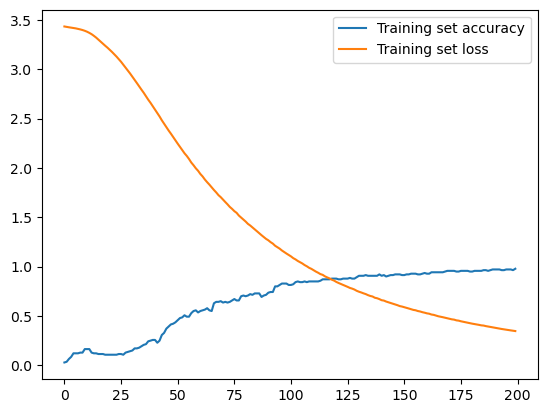

In [17]:
#Model Analysis
plt.plot(train.history['accuracy'], label = 'Training set accuracy')
plt.plot(train.history['loss'], label = 'Training set loss')
plt.legend()

In [18]:
#testing
import random
import numpy as np
import string

print("Selamat datang, ada yang ingin ditanyakan?")
while True:
  texts_p = []
  prediction_input = input('you : ')
  #removing punctuation
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  print("text_p",texts_p)
  #tokenizing and padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  print("p1",prediction_input)
  prediction_input = np.array(prediction_input).reshape(-1)
  print('p2',prediction_input)
  prediction_input = pad_sequences([prediction_input],input_shape)
  print('p3',prediction_input)


  #output
  output = model.predict(prediction_input)
  max_prob = max(model.predict(prediction_input))
  print('max_prob', max_prob)
  print('out1',output)
  max_idx = np.argmax(output)
  print('maxidx', max_idx)
  output = output.argmax()
  print('out',output)

  #finding the right tag and predicting
  if sum(np.array(prediction_input).reshape(-1)) <= 50:
    print("Maaf saya tidak mengerti")
  else:
    response_tag = le.inverse_transform([output])[0]
    print(response_tag)
    print("answer : " ,random.choice(responses[response_tag]))
  if response_tag == 'bye':
    break

 


Selamat datang, ada yang ingin ditanyakan?
text_p ['halo']
p1 [[101]]
p2 [101]
p3 [[  0   0   0   0   0   0   0   0 101]]
1/1 [==============================] - 0s 40ms/step
max_prob [2.5098717e-02 3.6537148e-02 9.1510337e-06 2.6411904e-05 3.4609000e-04
 7.3309609e-05 2.4479382e-02 1.9327970e-05 1.3429033e-04 1.0135145e-05
 1.3150777e-02 2.2362657e-04 1.8810516e-04 1.9338554e-02 6.2955194e-05
 6.8051770e-07 1.7355422e-04 3.0464972e-03 1.2171883e-02 4.6217980e-07
 2.8401392e-03 8.1689050e-03 8.5095561e-04 1.1375609e-05 5.1717376e-03
 2.5061686e-06 1.7728301e-04 1.1683734e-01 7.8819394e-03 6.6658008e-01
 5.6386601e-02]
out1 [[2.5098717e-02 3.6537148e-02 9.1510337e-06 2.6411904e-05 3.4609000e-04
  7.3309609e-05 2.4479382e-02 1.9327970e-05 1.3429033e-04 1.0135145e-05
  1.3150777e-02 2.2362657e-04 1.8810516e-04 1.9338554e-02 6.2955194e-05
  6.8051770e-07 1.7355422e-04 3.0464972e-03 1.2171883e-02 4.6217980e-07
  2.8401392e-03 8.1689050e-03 8.5095561e-04 1.1375609e-05 5.1717376e-03
  2.506168

In [25]:
import nltk

nltk.download("wordnet")
nltk.download('omw-1.4')

from nltk.corpus import wordnet

def cari_sinonim(kata):
    sinonim = []
    for synset in wordnet.synsets(kata, lang="ind"):
        for lemma in synset.lemmas(lang="ind"):
            sinonim.append(lemma.name())

    return sinonim

# Contoh penggunaan
kata = "batas"
sinonim = cari_sinonim(kata)
print(f"Sinonim dari kata '{kata}':")
for kata_sinonim in sinonim:
    print(kata_sinonim)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MRizky\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\MRizky\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Sinonim dari kata 'batas':
batas
membatasi
menghadkan
mengungkung
meringkukkan
batas
batasan
had
halangan
pembatasan
sekatan
sempadan
batas
kebun
batas
pinggir
pinggiran
susur
tepi
tepian
tubir
batas
had
kesetujuan
sempadan
takat
batas
batas
batasan
had
sekatan
batas
birai
margin
pinggir
batas
batasan
larangan
loncatan
sempadan
takat
tapal_batas
batas
bingkai
pembatasan
peminggiran
perbatasan
sempadan
tebing
batas
batas
gigi
perbatasan
pinggir
pinggiran
susur
tebing
tepi
tepian
tubir
ban
batas
batas
batas
had
jangkauan
keluasan
takat
batas
lingkungan
penghabisan


In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Unduh dataset untuk bahasa Indonesia
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Inisialisasi lemmatizer
lemmatizer = WordNetLemmatizer()

# Fungsi untuk melakukan preprocessing
def preprocess_text(text):
    # Tokenisasi teks
    tokens = word_tokenize(text)
    
    # Menghilangkan stopwords
    stopwords_id = set(stopwords.words('indonesian'))
    tokens = [token for token in tokens if token.lower() not in stopwords_id]
    
    # Lematisasi kata
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Menggabungkan kembali kata-kata yang telah diproses menjadi kalimat
    processed_text = ' '.join(tokens)
    
    return processed_text



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MRizky\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MRizky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MRizky\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [24]:

# Contoh penggunaan
text = "batas"
processed_text = preprocess_text(text)
print(processed_text)

bata
